<a href="https://colab.research.google.com/github/mirunam0/ML/blob/main/Alzheimers_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"geoooo111","key":"faabe560d5048decebb0487cb267d9e9"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d rabieelkharoua/alzheimers-disease-dataset


Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset
License(s): Attribution 4.0 International (CC BY 4.0)


In [7]:
!unzip alzheimers-disease-dataset.zip


Archive:  alzheimers-disease-dataset.zip
  inflating: alzheimers_disease_data.csv  


In [9]:
import pandas as pd


In [10]:
alzheimers_disease_data = pd.read_csv('/content/alzheimers_disease_data.csv')


In [11]:
alzheimers_disease_data.head()


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [12]:
alzheimers_disease_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [13]:
alzheimers_disease_data.shape

(2149, 35)

In [14]:
alzheimers_disease_data.isnull().sum()

,0
PatientID,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0


In [15]:
print(alzheimers_disease_data['Diagnosis'])


0       0
1       0
2       0
3       0
4       0
       ..
2144    1
2145    1
2146    1
2147    1
2148    0
Name: Diagnosis, Length: 2149, dtype: int64


In [16]:
unique_val = alzheimers_disease_data['Diagnosis'].unique()
print(unique_val)

[0 1]


In [17]:
alzheimers_disease_data.dtypes

,0
PatientID,int64
Age,int64
Gender,int64
Ethnicity,int64
EducationLevel,int64
BMI,float64
Smoking,int64
AlcoholConsumption,float64
PhysicalActivity,float64
DietQuality,float64


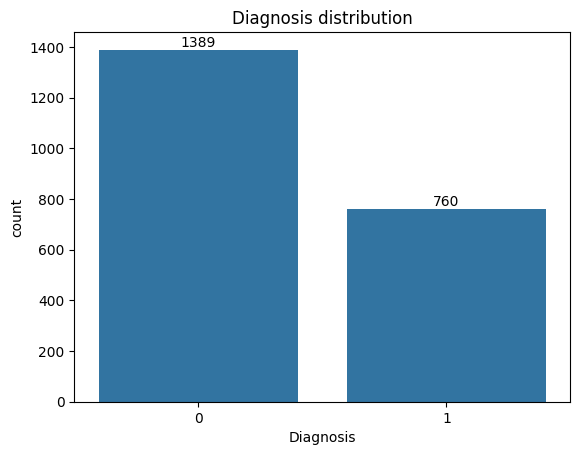

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

ax=sns.countplot(data=alzheimers_disease_data, x='Diagnosis')
for container in ax.containers:
    ax.bar_label(container)

plt.title("Diagnosis distribution")
plt.show()

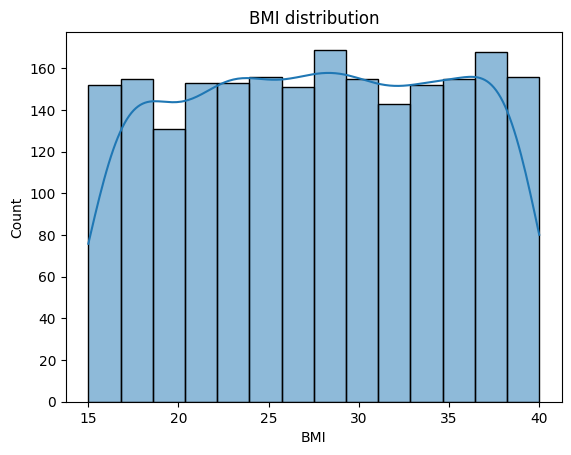

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=alzheimers_disease_data, x='BMI', kde=True)
plt.title("BMI distribution")
plt.show()

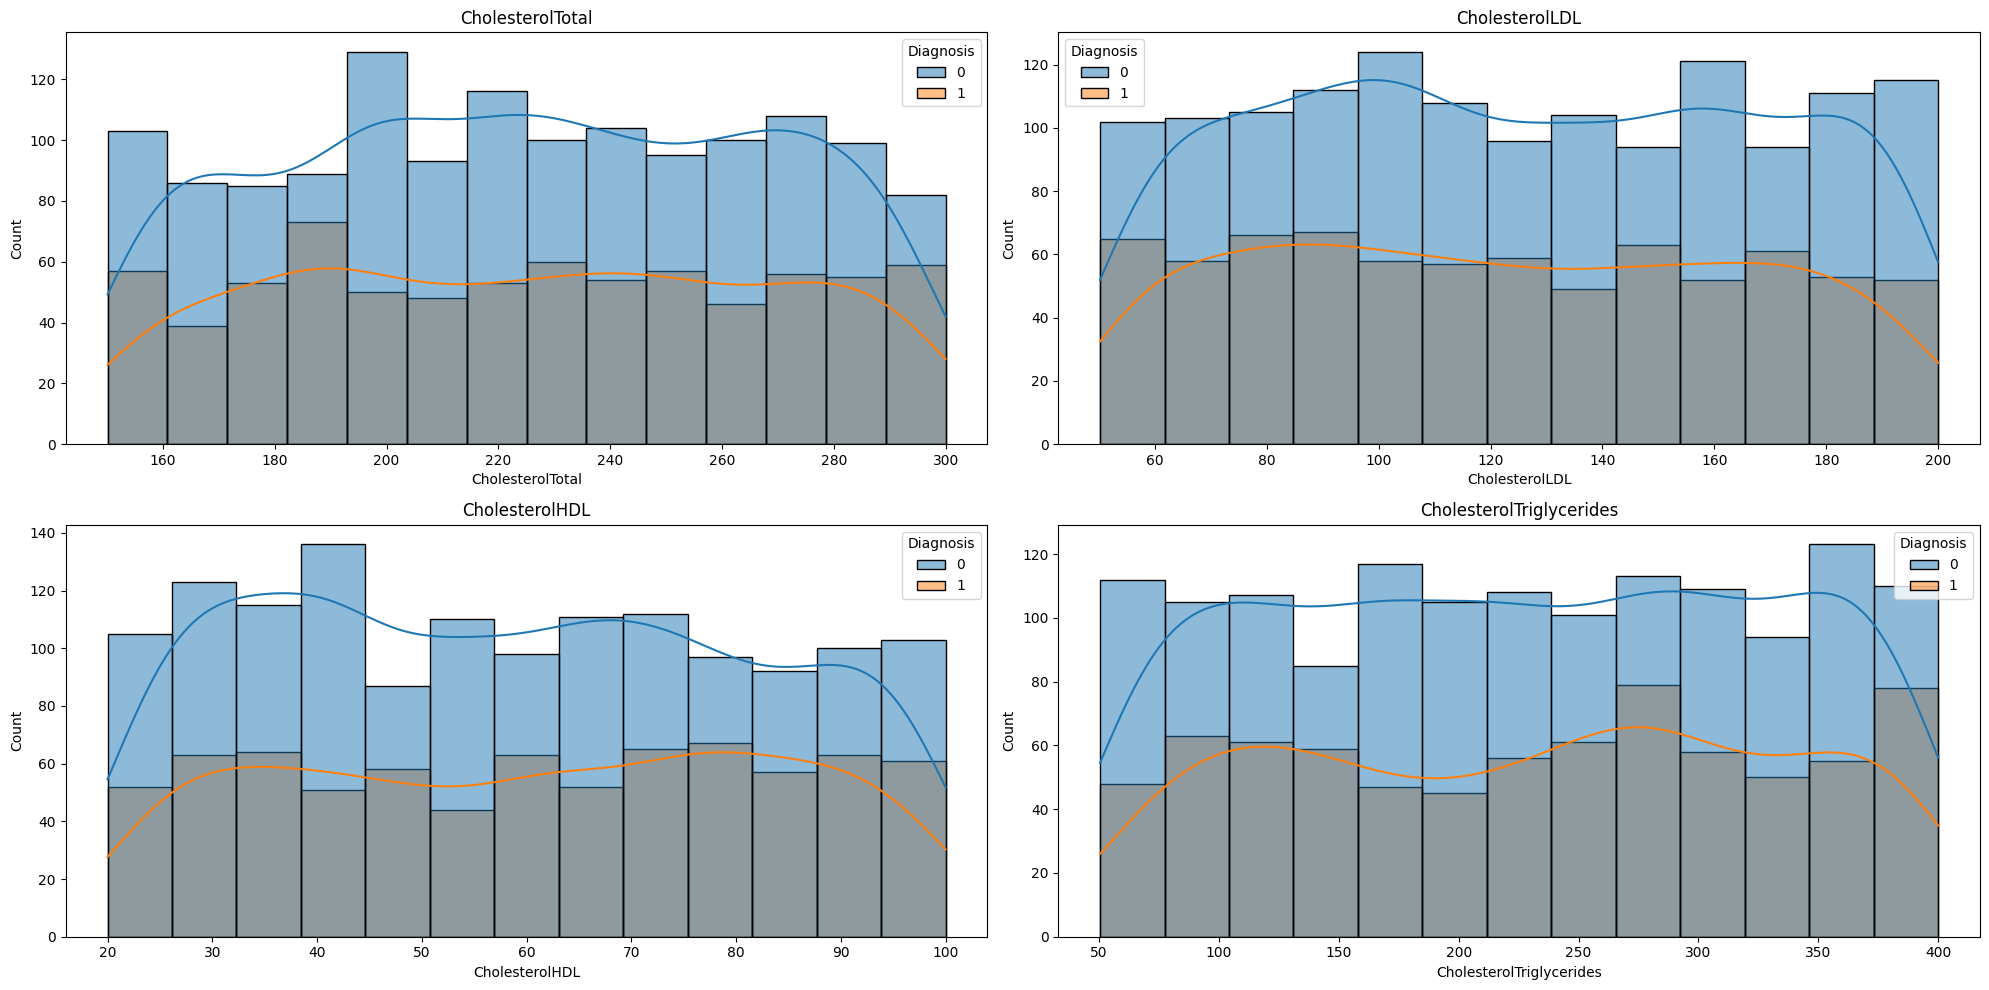

In [21]:
fig, ax = plt.subplots(2,2,figsize=(20, 10))
sns.histplot(x = 'CholesterolTotal', hue='Diagnosis', data = alzheimers_disease_data, ax = ax[0,0], kde = True).set_title('CholesterolTotal')
sns.histplot(x = 'CholesterolLDL', hue='Diagnosis', data = alzheimers_disease_data, ax = ax[0,1], kde = True).set_title('CholesterolLDL')
sns.histplot(x = 'CholesterolHDL', hue='Diagnosis', data = alzheimers_disease_data, ax = ax[1,0], kde = True).set_title('CholesterolHDL')
sns.histplot(x = 'CholesterolTriglycerides', hue='Diagnosis', data = alzheimers_disease_data, ax = ax[1,1], kde = True).set_title('CholesterolTriglycerides')
plt.tight_layout()


Text(0.5, 1.0, 'Confusion')

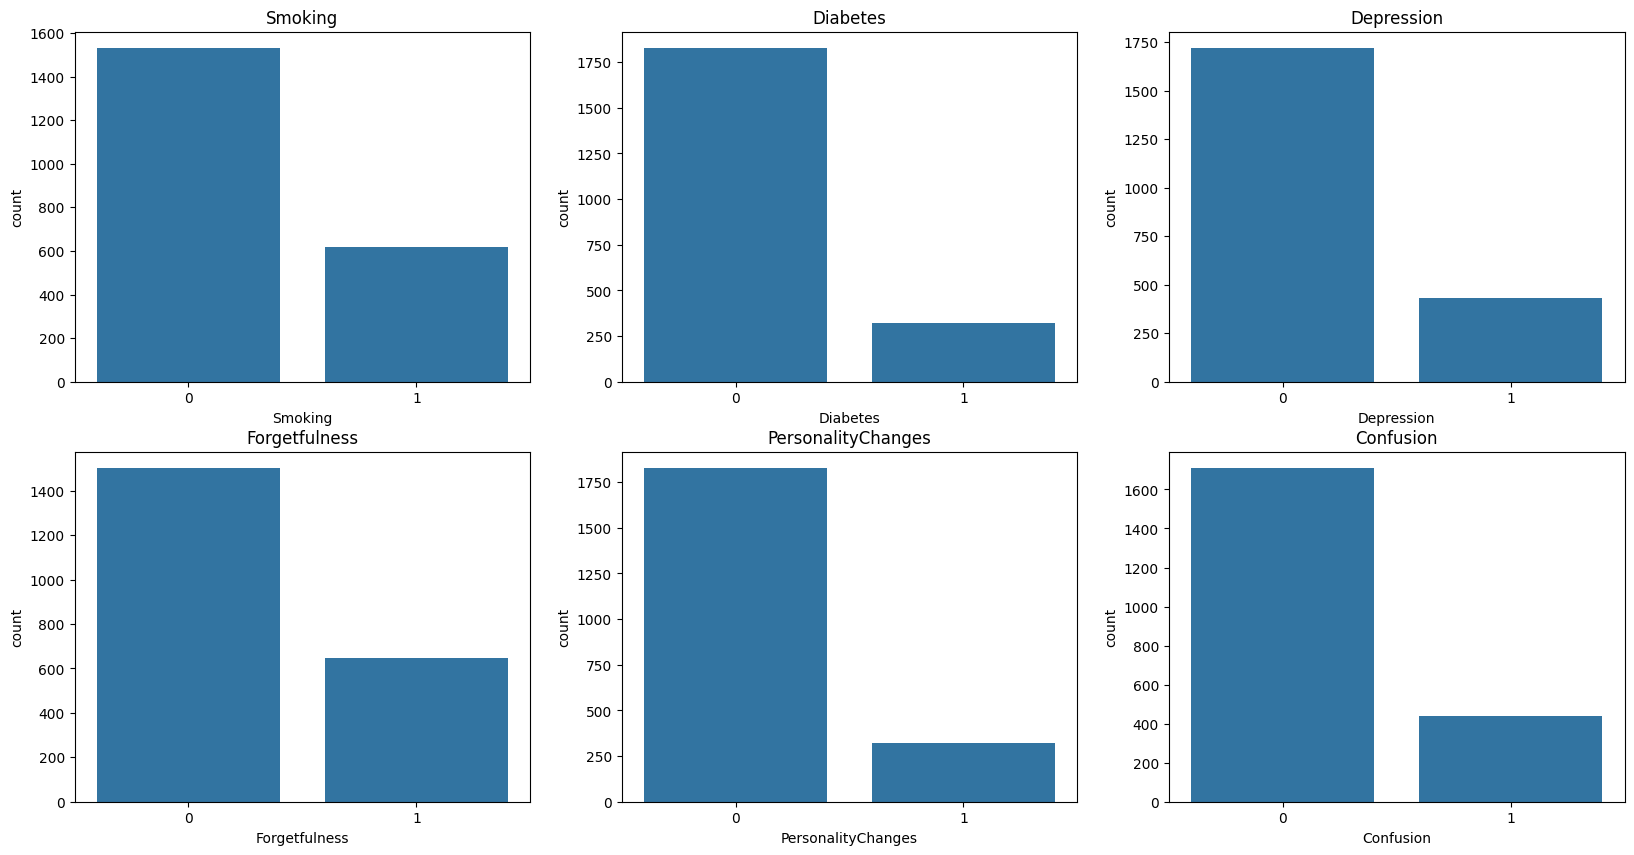

In [25]:
fig, ax = plt.subplots(2,3,figsize=(20, 10))
sns.countplot(x = 'Smoking', data = alzheimers_disease_data, ax = ax[0,0]).set_title('Smoking')
sns.countplot(x = 'Diabetes', data = alzheimers_disease_data, ax = ax[0,1]).set_title('Diabetes')
sns.countplot(x = 'Depression', data = alzheimers_disease_data, ax = ax[0,2]).set_title('Depression')
sns.countplot(x = 'Forgetfulness', data = alzheimers_disease_data, ax = ax[1,0]).set_title('Forgetfulness')
sns.countplot(x = 'PersonalityChanges', data = alzheimers_disease_data, ax = ax[1,1]).set_title('PersonalityChanges')
sns.countplot(x = 'Confusion', data = alzheimers_disease_data, ax = ax[1,2]).set_title('Confusion')

Split - train and test

In [29]:
alzheimers_disease = alzheimers_disease_data.drop('DoctorInCharge', axis=1)


In [30]:
X = alzheimers_disease.drop(columns=['Diagnosis'])
y = alzheimers_disease['Diagnosis']


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [32]:
X_train.shape

(1504, 33)

After the dataset is splitted to train and test, data is standardized to have mean 0 and standard deviation 1


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)

X_test_s = scaler.transform(X_test)

Select variables with feature importance


In [34]:
import lightgbm as lgb

from sklearn.model_selection import train_test_split
import numpy as np


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score


In [53]:
model = LGBMClassifier(random_state=42)
feature_importances = np.zeros(X_train_s.shape[1])

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
auc_scores = []

In [62]:
for fold, (train_index, valid_index) in enumerate(kf.split(X_train_s, y_train)):
    X_train_fold = X_train_s[train_index]
    X_valid_fold = X_train_s[valid_index]
    y_train_fold = y_train.iloc[train_index]
    y_valid_fold = y_train.iloc[valid_index]

In [64]:
model.fit(X_train_fold, y_train_fold)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 413, number of negative: 791
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3554
[LightGBM] [Info] Number of data points in the train set: 1204, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.343023 -> initscore=-0.649850
[LightGBM] [Info] Start training from score -0.649850
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(random_state=42)

In [65]:
feature_importances += model.feature_importances_


In [66]:
y_pred_prob = model.predict_proba(X_valid_fold)[:, 1]
auc = roc_auc_score(y_valid_fold, y_pred_prob)
auc_scores.append(auc)

print(f"Fold {fold+1} - AUC: {auc:.4f}")

Fold 5 - AUC: 0.9851


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [67]:
feature_importances /= kf.get_n_splits()

feature_names = X.columns if isinstance(X, pd.DataFrame) else [f'Feature {i}' for i in range(X_train_s.shape[1])]

# DataFrame
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)


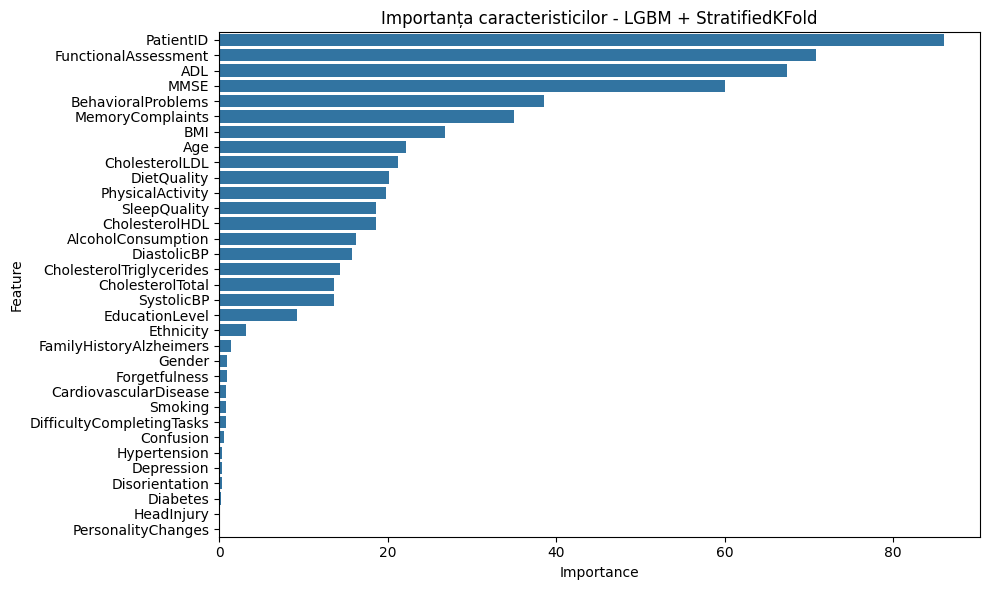

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(data=fi_df, x='Importance', y='Feature')
plt.title('Importanța caracteristicilor - LGBM + StratifiedKFold')
plt.tight_layout()
plt.show()

Create a subset with variable chose using feature importance


In [70]:
top_features = fi_df['Feature'].head(12).tolist()[1:]
print(top_features)


['FunctionalAssessment', 'ADL', 'MMSE', 'BehavioralProblems', 'MemoryComplaints', 'BMI', 'Age', 'CholesterolLDL', 'DietQuality', 'PhysicalActivity', 'SleepQuality']


In [71]:
X_train_tf = X_train[top_features]
X_test_tf = X_test[top_features]


Decision tree -  Non-parametric supervised learning method for regression & classification

Criterions to create decision trees: entropy Entropy(play) = – p(Yes) . log2p(Yes) – p(No) . log2p(No)



In [75]:
y_train.value_counts()


,count
Diagnosis,
0,988
1,516


In [76]:
Entropy_Play = -(516/1504)*np.log2(516/1504) -(988/1504)*np.log2(988/1504)


In [77]:
Entropy_Play


np.float64(0.9277403885100438)

Information Gain

Decision tree for clasification

In [78]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz, ExtraTreeClassifier

In [79]:
dt = DecisionTreeClassifier(criterion='entropy')


In [80]:
dt.fit(X_train_tf,y_train)


DecisionTreeClassifier(criterion='entropy')

In [82]:
export_graphviz(dt,'dt.tree')


In [86]:
feature_names = X_train_tf.columns.tolist()
print(feature_names)

['FunctionalAssessment', 'ADL', 'MMSE', 'BehavioralProblems', 'MemoryComplaints', 'BMI', 'Age', 'CholesterolLDL', 'DietQuality', 'PhysicalActivity', 'SleepQuality']


In [88]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt, out_file=None, feature_names=X_train_tf.columns,
                           class_names=['0', '1'], filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("tree")  # salvează ca PDF
graph.view()

'tree.pdf'

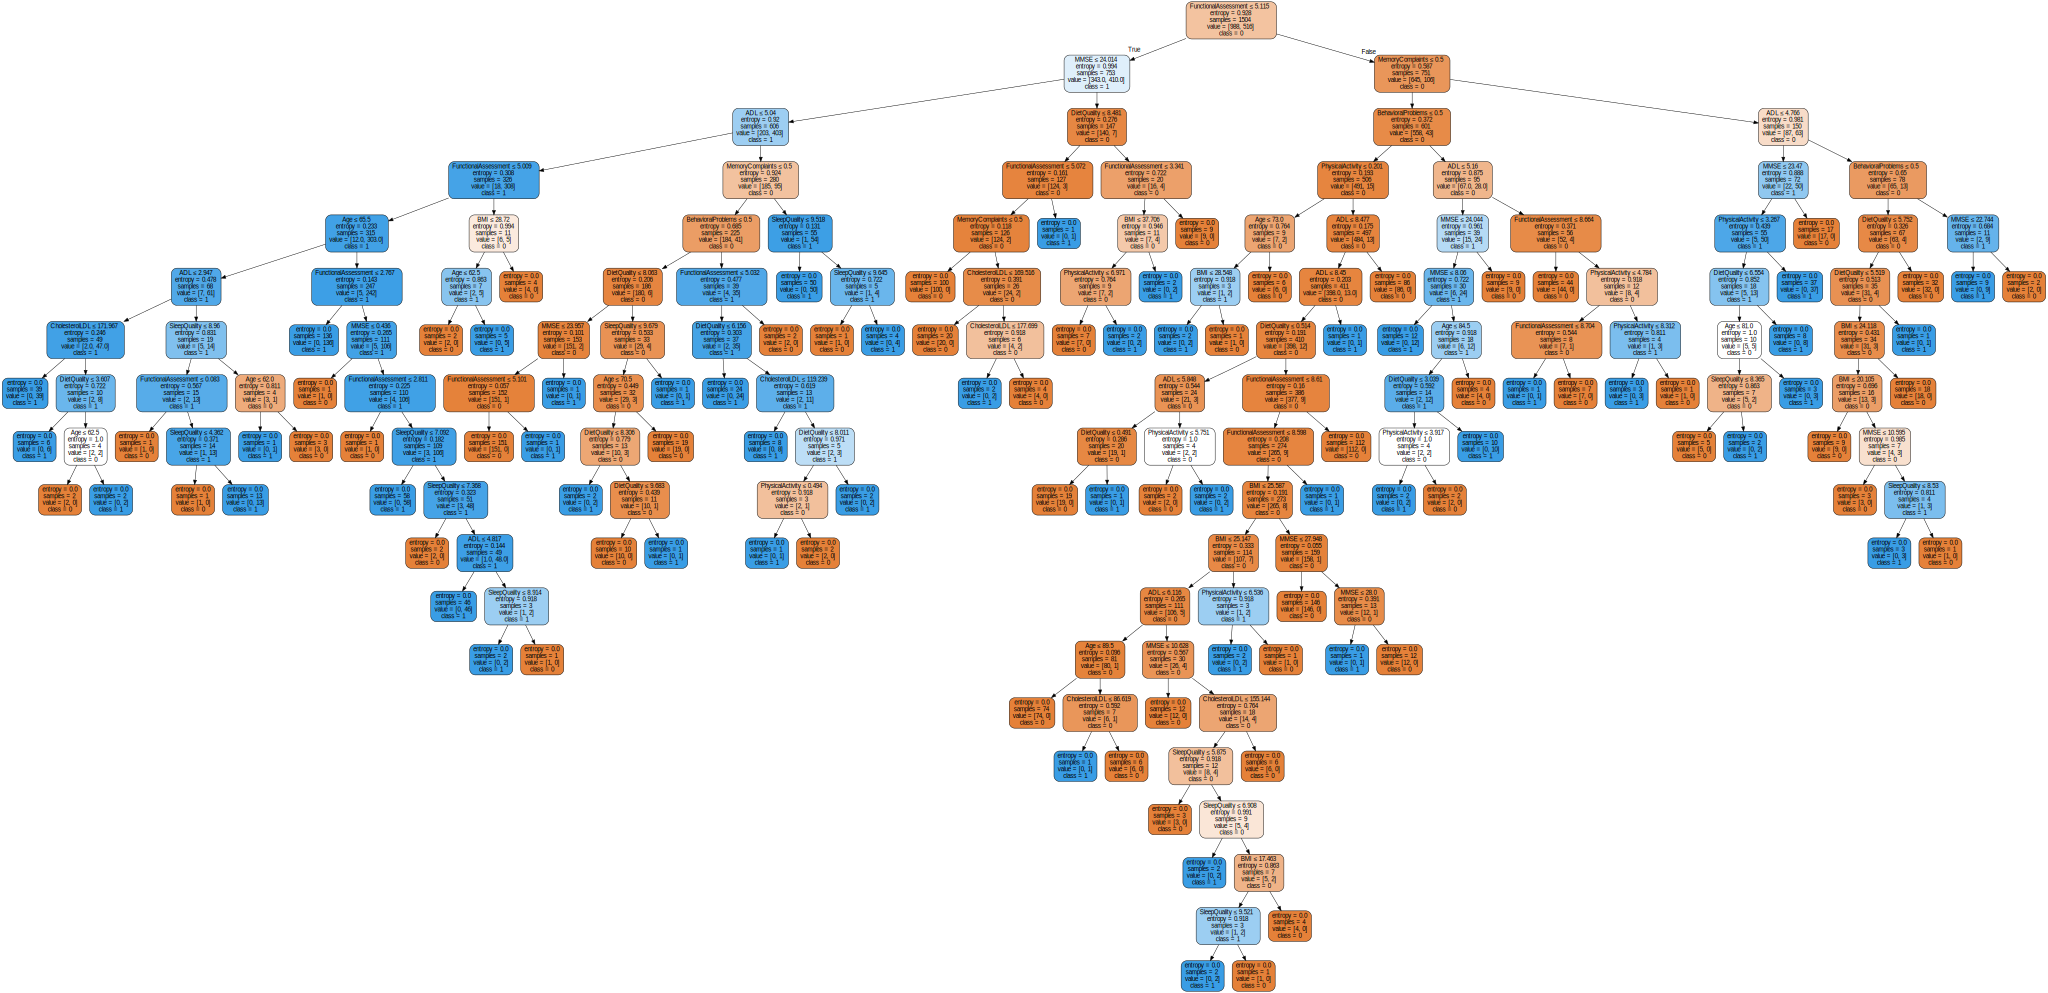

In [90]:
graph

Pruning - because the tree is too complex

In [92]:
path = dt.cost_complexity_pruning_path(X_train_tf, y_train)
ccp_alphas = path.ccp_alphas


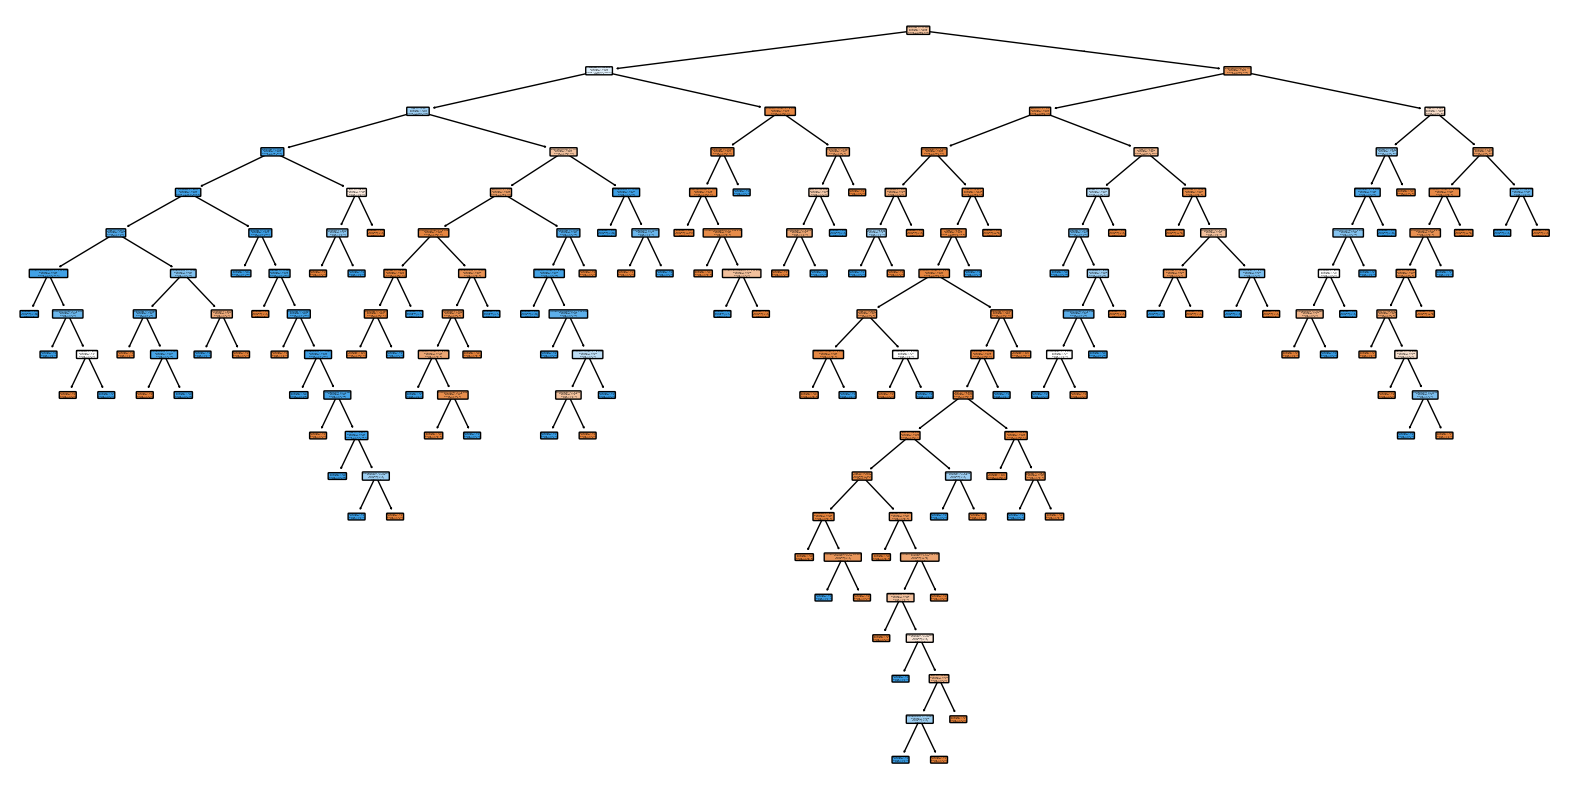

In [93]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)
plt.show()

In [95]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=10,
    min_samples_leaf=5,
    ccp_alpha=0.01,
    random_state=42
)

dt.fit(X_train_tf, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=4, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

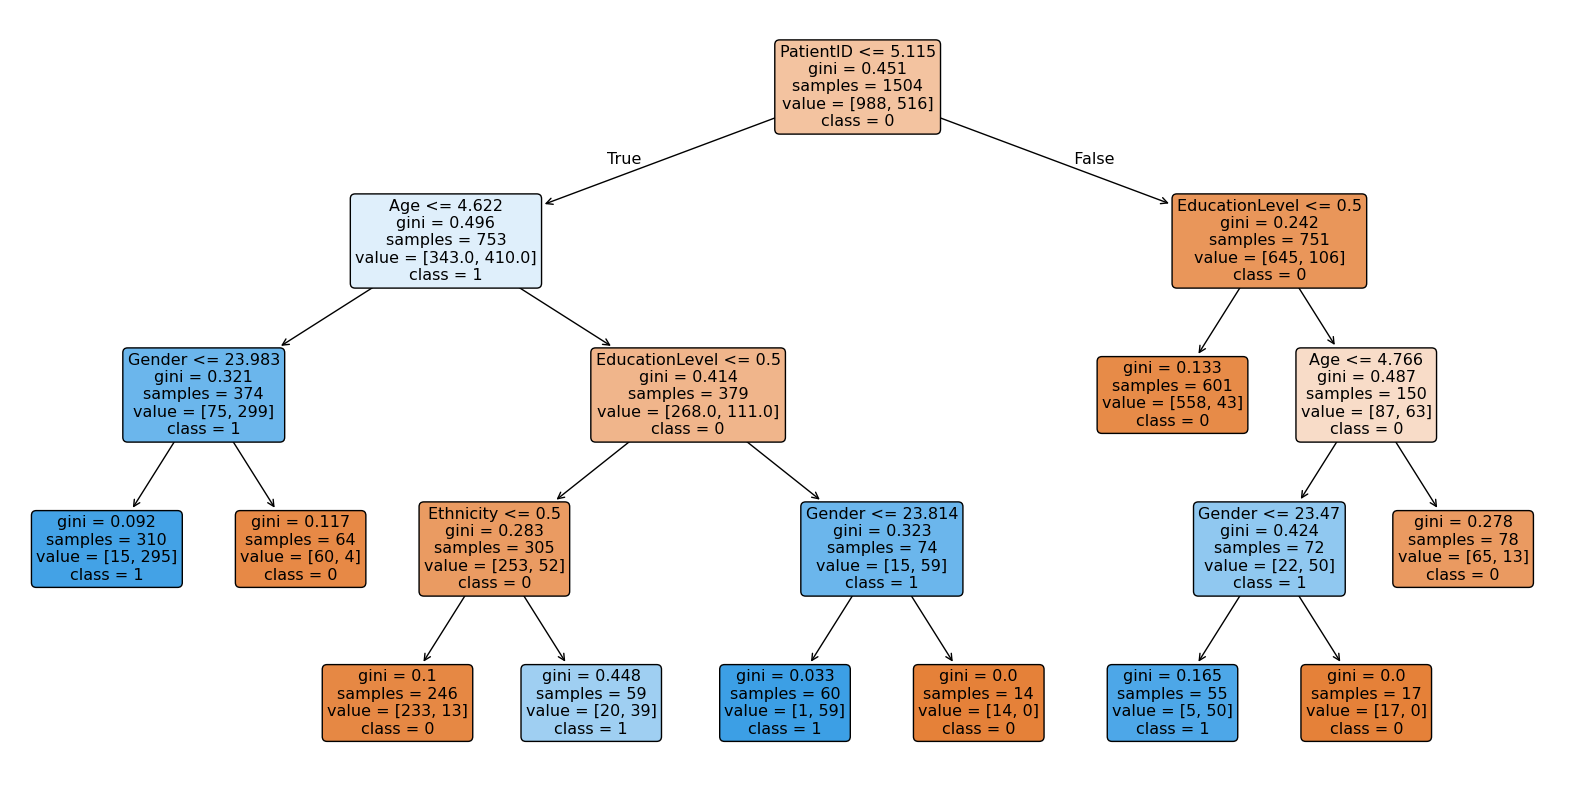

In [96]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['0', '1'], rounded=True)
plt.show()

AUC and ROC for decision tree


AUC: 0.915


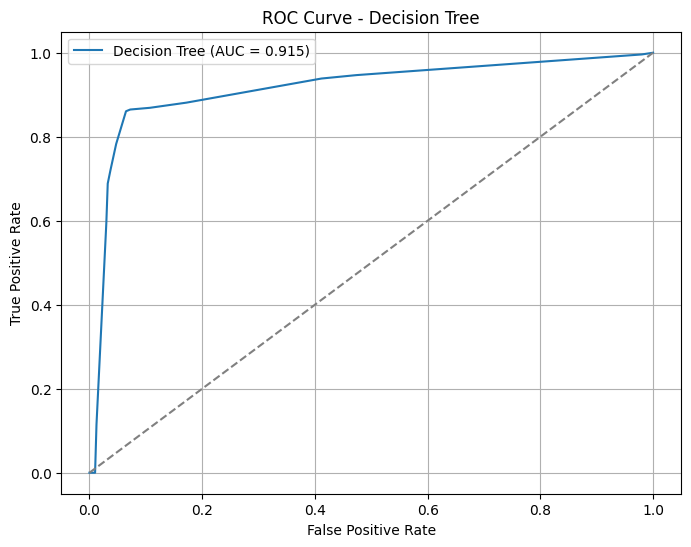

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train_tf, y_train)

y_probs = dt.predict_proba(X_test_tf)[:, 1]

#ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

#plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')  # linia random
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.grid(True)
plt.show()

In [100]:
print(f"AUC: {auc:.3f}")


AUC: 0.915


In [102]:
from sklearn.metrics import classification_report
y_pred = (y_probs >= 0.5).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       401
           1       0.89      0.86      0.88       244

    accuracy                           0.91       645
   macro avg       0.90      0.90      0.90       645
weighted avg       0.91      0.91      0.91       645



Logistic regression

In [103]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train_tf)
result=logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.365417
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 1504
Model:                          Logit   Df Residuals:                     1493
Method:                           MLE   Df Model:                           10
Date:                Sun, 04 May 2025   Pseudo R-squ.:                  0.4318
Time:                        12:28:28   Log-Likelihood:                -549.59
converged:                       True   LL-Null:                       -967.16
Covariance Type:            nonrobust   LLR p-value:                5.702e-173
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
FunctionalAssessment    -0.4484      0.031    -14.299      0.000      -0.510      -0.387

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train_tf, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
y_pred = logreg.predict(X_test_tf)


In [110]:
print('Accuracy : {:.2f}'.format(logreg.score(X_test_tf, y_test)))


Accuracy : 0.81


In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[361  40]
 [ 83 161]]


In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.90      0.85       401
           1       0.80      0.66      0.72       244

    accuracy                           0.81       645
   macro avg       0.81      0.78      0.79       645
weighted avg       0.81      0.81      0.80       645

